# Support Vector Regression | Machine Learning

Author : Shazzy <br>
Research : SVR for Predicting Performance <br>
Level : Basic

### What is Support Vector Regression (SVR) ? 

Support Vector Regression(SVR) is quite different than other Regression models. <br><br> It uses Support Vector Machine(SVM, a classification algorithm) algorithm to predict a continuous variable. <br> While other linear regression models try to minimize the error between the predicted and the actual value,<br><br> **Support Vector Regression tries to fit the best line within a predefined or threshold error value.** 

### What Support Vector Regression does?

It tries to classify all the prediction lines in two types, ones that pass through the error boundary (space separated by two parallel lines) and ones that don't. <br> <br> Those lines which do not pass the error boundary are not considered as the difference between the predicted value and the actual value has exceeded the error threshold, Ɛ (epsilon). <br> <br> The lines that pass, are considered for a potential support vector to predict the value of an unknown

Note: *Epsilon in math, represented by the Greek letter "E," is a positive infinitesimal quantity. Essentially, it denotes a very small number that is not negative, approaching zero but staying positive.*

### SVR explained with graph

To understand better, some key terms are being used in interpreting the graphs

**Kernel**: Kernel is a function that is used to map a lower dimensional data points into a higher dimensional data points. As SVR performs linear regression in a higher dimension, this function is crucial. There are many types of kernel such as Polynomial Kernel, Gaussian Kernel, Sigmoid Kernel etc.

**Hyper Plane** (blue line): In Support Vector Machine, a hyperplane is a line used to separate two data classes in a higher dimension than the actual dimension. In SVR, hyperplane is the line that is used to predict the continuous value.

**Boundary Line** (red line): Two parallel lines drawn to the two sides of Support Vector with the error threshold value,  Ɛ (epsilon) are known as boundary line. This lines creates a margin between the data points.

**Support Vector**: The line from which the distance is minimum or least from two boundary data points.

<img src="https://cdn-images-1.medium.com/max/800/1*o3Gmkg7BRAvzyIDwRGhxPg.png" />

The boundary are trying to fit as much instances as possible without violating the margin. The width of the boundary is controlled by the error threshold Ɛ (epsilon). In classification, the support vector X is used to define the hyperplane that separated the two different classes. 

<img src="https://cdn-images-1.medium.com/max/800/1*fVCEP_qxSWYwKcpkt2Xk2w.png" />

Figure about illustrate how all the points are within the boundary line(Red Line).Our objective when we are moving on with SVR is to basically consider the points that are within the boundary line. <br><br> **Our best fit line is the line hyperplane that has maximum number of points.**

### Math behind SVR 

So the first thing we have to understand is what is this boundary line ?(yes! that red line). Think of it as to lines which are at a distance of ‘e’ (though not e its basically epsilon) but for simplicity lets say its ‘e’. <br><br> So the lines that we draw are at ‘+e’ and ‘-e ’ distance from Hyper Plane. 

Assuming our hyper plane is a straight line going through the Y axis <br><br>
We can say that the Equation of the hyper plane is

\begin{equation*}
wx+b=0
\end{equation*}

So we can state that the two the equation of the boundary lines are

\begin{equation*}
Wx+b= +e \end{equation*}<br>
\begin{equation*}
Wx+b= -e
\end{equation*}

Thus coming in terms with the fact that for any linear hyper plane the equation that satisfy our SVR is:

\begin{equation*}
e≤y-Wx-b≤+e
\end{equation*}

stating the fact that $y=Wx+b$ | $y-Wx-b=0$

<img src="https://cdn-images-1.medium.com/max/800/1*rs0EfF8RPVpgA-EfgAq85g.jpeg" />

Thus the decision boundary is our Margin of tolerance that is We are going to take only those points who are within this boundary.

Or in simple terms that we are going to take only those those points which have least error rate. Thus giving us a better fitting model.

Additional References: 
    
<https://medium.com/coinmonks/support-vector-regression-or-svr-8eb3acf6d0ff>
<https://www.mathworks.com/help/stats/understanding-support-vector-machine-regression.html>
<http://www.aionlinecourse.com/tutorial/machine-learning/support-vector-regression>
<http://kernelsvm.tripod.com/>
<https://www.saedsayad.com/support_vector_machine_reg.htm>

Plotting SVR: <br>
<https://jacopofarina.eu/posts/visualize-the-functioning-of-supervised-learning-models/>

## Plot SVR using matplotlib

In [46]:
%matplotlib inline

Automatically created module for IPython interactive environment


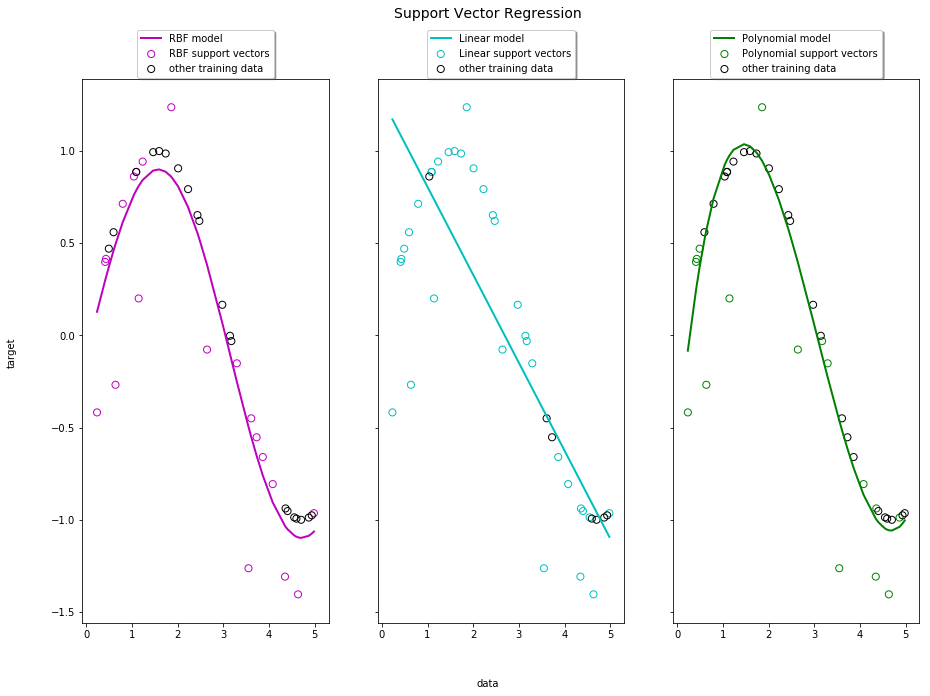

In [25]:
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
[2.12998819] 2.3688522493273485
[2.91907141] 3.285632204333334
[3.02825117] 2.953252316970487
[3.21241735] 3.3448365096752717
[2.84114287] 2.7413569211507602
[2.09354503] 2.629728633229279
[2.71700547] 3.092804036168382
[2.97862119] 3.2818706188759346
[3.40296856] 3.0690924469559113
[3.15686687] 3.8962639841272315
[3.95510045] 2.963577687955483
[4.06240409] 2.8227461040611517
[3.52296771] 3.623387735802008
[4.41282252] 3.8982877638029247


c:\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



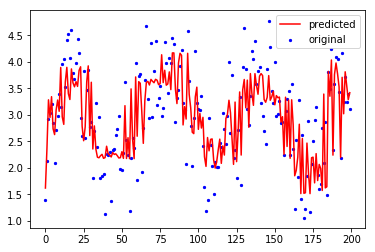

0.6066306757957185
Mean Squared Error: 0.30499845231798917
Root Mean Squared Error: 0.5522666496521306


In [26]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error 

random.seed(123)
def getData(N):
 x,y =[],[]
 for i in range(N):  
  a = i/10+random.uniform(-1,1)
  yy =math.sin(a)+3+random.uniform(-1,1)
  x.append([a])
  y.append([yy])
  
 return np.array(x), np.array(y)

x,y=getData(200)
model = SVR()
print(model)

model.fit(x,y)
pred_y = model.predict(x)
for yo, yp in zip(y[1:15,:], pred_y[1:15]):
 print(yo,yp)

x_ax=range(200)
plt.scatter(x_ax, y, s=5, color="blue", label="original")
plt.plot(x_ax, pred_y, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()

score=model.score(x,y)
print(score)

mse =mean_squared_error(y, pred_y)
print("Mean Squared Error:",mse)

rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Next task : 
 - Try SVR on small datasets 
 - Try SVr using the paper datasets given in csv